In [40]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import *

(training_images, training_labels), (testing_images, testing_labels) = keras.datasets.cifar10.load_data()
training_images, testing_images = training_images / 255, testing_images / 255

class_names = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']



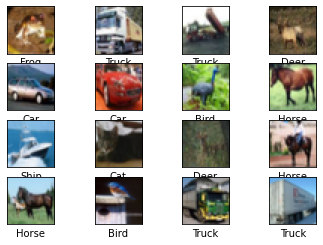

In [41]:
for i in range(16):
    plt.subplot(4, 4, int(i)+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(training_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[training_labels[i][0]])
plt.show()



In [43]:
training_images = training_images[:20000]
training_labels = training_labels[:20000]
testing_images = testing_images[:4000]
testing_labels = testing_labels[:4000]

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10, validation_data=(testing_images, testing_labels))




Epoch 1/10
625/625 [==============================] - 37s 56ms/step - loss: 1.7806 - accuracy: 0.3430 - val_loss: 1.5722 - val_accuracy: 0.4185
Epoch 2/10
625/625 [==============================] - 33s 54ms/step - loss: 1.4448 - accuracy: 0.4750 - val_loss: 1.4007 - val_accuracy: 0.4983
Epoch 3/10
625/625 [==============================] - 36s 57ms/step - loss: 1.2994 - accuracy: 0.5329 - val_loss: 1.2442 - val_accuracy: 0.5485
Epoch 4/10
625/625 [==============================] - 35s 55ms/step - loss: 1.2006 - accuracy: 0.5720 - val_loss: 1.2143 - val_accuracy: 0.5663
Epoch 5/10
625/625 [==============================] - 34s 54ms/step - loss: 1.1153 - accuracy: 0.6022 - val_loss: 1.1844 - val_accuracy: 0.5755
Epoch 6/10
625/625 [==============================] - 36s 57ms/step - loss: 1.0380 - accuracy: 0.6334 - val_loss: 1.1521 - val_accuracy: 0.5920
Epoch 7/10
625/625 [==============================] - 34s 55ms/step - loss: 0.9747 - accuracy: 0.6517 - val_loss: 1.0967 - val_accuracy:

In [44]:
loss, accuracy = model.evaluate(testing_images, testing_labels)
print(f"Loss:{loss}")
print(f"Accuracy:{accuracy}")
model.save("image_classifier.model")


125/125 [==============================] - 2s 15ms/step - loss: 1.0880 - accuracy: 0.6290
Loss:1.0880440473556519
Accuracy:0.6290000081062317
